# Assignment 3: Correlation Analysis and Bootstrapping

## Objective

The field of statistics is divided into two major parts: descriptive and inferential. In this assignment, we will cover two important topics in statistics: correlation analysis and bootstrapping, where the former belongs to the descriptive part and the latter belongs to the inferential part. After this assignment, you will be able to answer the following questions:

1. How to visualize the relationship between two variables?  
2. What is Pearson's correlation? How to compute it?
3. What is Spearman's rank correlation? How to compute it?
4. What's the difference between Pearson's correlation and Spearman's rank correlation?
5. How to estimate a population parameter based on a sample?
6. How to use the bootstrap to quantify the uncertainty of an estimated value?

**Requirements:**
* Use [pandas](https://pandas.pydata.org/) to manipulate data.
* Use [matplotlib](https://matplotlib.org/) or [seaborn](https://seaborn.pydata.org) to make plots.
* Please pay attention to visualization principles.


The data should be part of the downloaded [A3.zip](https://coursys.sfu.ca/2024sp-cmpt-733-g1/pages/A3).


## Part 1. Correlation Analysis

As a data scientist, you often face this kind of question: "Are A and B correlated?" For example,

* Do Canadian Currency and Oil Price move together?
* Do Vancouver Housing Price and US Stock Market have any correlation?
* Are GPA and Gender independent?

To answer these questions, you need to conduct a correlation analysis.

Imagine you are a data scientist working at a real-estate company. You could have downloaded the property_tax_report from this [webpage](https://opendata.vancouver.ca/explore/dataset/property-tax-report/table/?refine.report_year=2023). The dataset contains information on properties from BC Assessment (BCA) and City sources in 2023.  

You may think that for a newly built house, it tends to have a higher price than the ones built decades ago. In this assignment, your first job is to figure out whether YEAR_BUILT and HOUSE_PRICE are correlated.

We first load the data as a DataFrame.

In [105]:
import pandas as pd

df = pd.read_csv("property-tax-report_2023.zip", compression='zip', header=0, sep=';', quotechar='"')

In [106]:
df['HOUSE_PRICE'] = df.apply(lambda x: (x['CURRENT_LAND_VALUE'] \
                                        +x['CURRENT_IMPROVEMENT_VALUE'])/1000000.0, axis = 1)

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095658 entries, 0 to 1095657
Data columns (total 30 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   PID                         1092876 non-null  object 
 1   LEGAL_TYPE                  1095658 non-null  object 
 2   FOLIO                       1095658 non-null  int64  
 3   LAND_COORDINATE             1095658 non-null  int64  
 4   ZONING_DISTRICT             1095629 non-null  object 
 5   ZONING_CLASSIFICATION       1089974 non-null  object 
 6   LOT                         1088056 non-null  object 
 7   PLAN                        1094562 non-null  object 
 8   BLOCK                       442234 non-null   object 
 9   DISTRICT_LOT                1041630 non-null  object 
 10  FROM_CIVIC_NUMBER           551237 non-null   object 
 11  TO_CIVIC_NUMBER             1092849 non-null  float64
 12  STREET_NAME                 1094907 non-null  object 
 1

### Task A. Visualizations

Since the housing price varies a lot by locations, we will only consider the houses whose postcode starts with 'V6A'. Furthermore, we remove the houses that were built before 1900.

<img src="img/v6a.png" width="400">

In the following, please make two subplots in one row. For the left subplot, it is a scatter plot with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`; for the right subplot, it is a hexbin plot (gridsize = 20) with X = `YEAR_BUILT` and Y = `HOUSE_PRICE`.

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert the "PROPERTY_POSTAL_CODE" col to str
df['PROPERTY_POSTAL_CODE'] = df['PROPERTY_POSTAL_CODE'].astype(str)

# Convert to lower case and filter
df_v6a = df[df['PROPERTY_POSTAL_CODE'].str.lower().str.startswith('v6a')]

# Remove houses built before 1900
filtered_df = df_v6a[df_v6a['YEAR_BUILT'] >= 1900]

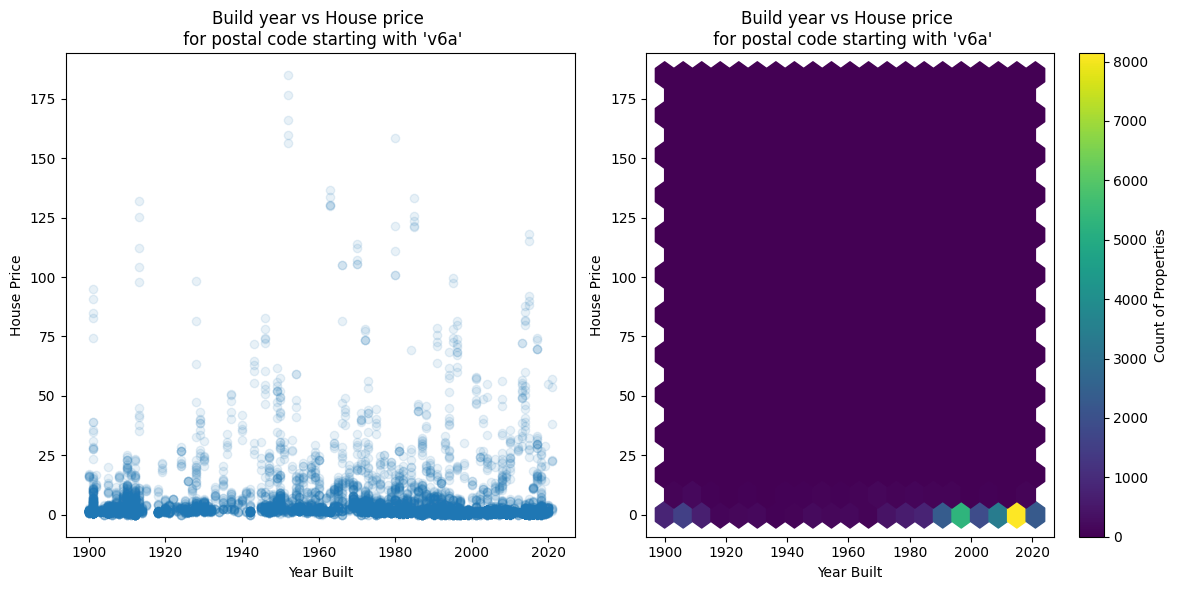

In [109]:
# Create two subplots on one row
fig, axs = plt.subplots(1, 2, figsize=(12,6))

# Create the first plot
axs[0].scatter(filtered_df['YEAR_BUILT'], filtered_df['HOUSE_PRICE'], alpha=0.1)
axs[0].set_title('Build year vs House price \n for postal code starting with \'v6a\'')
axs[0].set_xlabel('Year Built')
axs[0].set_ylabel('House Price')

# Create the second plot
hexbin = axs[1].hexbin(filtered_df['YEAR_BUILT'], filtered_df['HOUSE_PRICE'], gridsize=20)
axs[1].set_title('Build year vs House price \n for postal code starting with \'v6a\'')
axs[1].set_xlabel('Year Built')
axs[1].set_ylabel('House Price')
colour_bar = fig.colorbar(hexbin, ax=axs[1])
colour_bar.set_label('Count of Properties')

plt.tight_layout()

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. While across all years the typical house price is well under \$5M, there are certain years where extremely expensive houses are built, as can be witnessed by the vertical alignment of circles with high y-axis values on the scatterplot. For example, around 1950 it appears that there are 5 outlier houses that are valued north of \$150M, whereas in the entire dataset there is only one other house with a similar valuation. We see similar patterns for 1900 and 1910. In contrast, between 1995 and 2017 or so, no houses valued over \$60M were built.
2. The majority of houses in BC were built between 1990 and the present, with an extremely high number of these being built just before 2000, and again in the late 2010's. This is evidenced through the count of the hexbin plot where we can see that over 8000 properties were built in the 2010's with a valuation less than \$1M. The number built in the years just before 2000 with a valuation less than \$1M appears to be in the 5000 range.

The above plots provide a general impression of the relationship between variables. There are some other visualizations that can provide more insights. One option is to bin one variable and plot percentiles of the other.


In the following, please make three subplots in a row, where each subplot is a scatter plot with X = YEAR_BUILT and Y = HOUSE_PRICE.
* The first subplot shows how the 25th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `25TH_HOUSE_PRICE`);
* The second subplot shows how the 50th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `50TH_HOUSE_PRICE`);
* The third subplot shows how the 75th percentile of `HOUSE_PRICE` changes over years (X = `YEAR_BUILT`, Y = `75TH_HOUSE_PRICE`);  


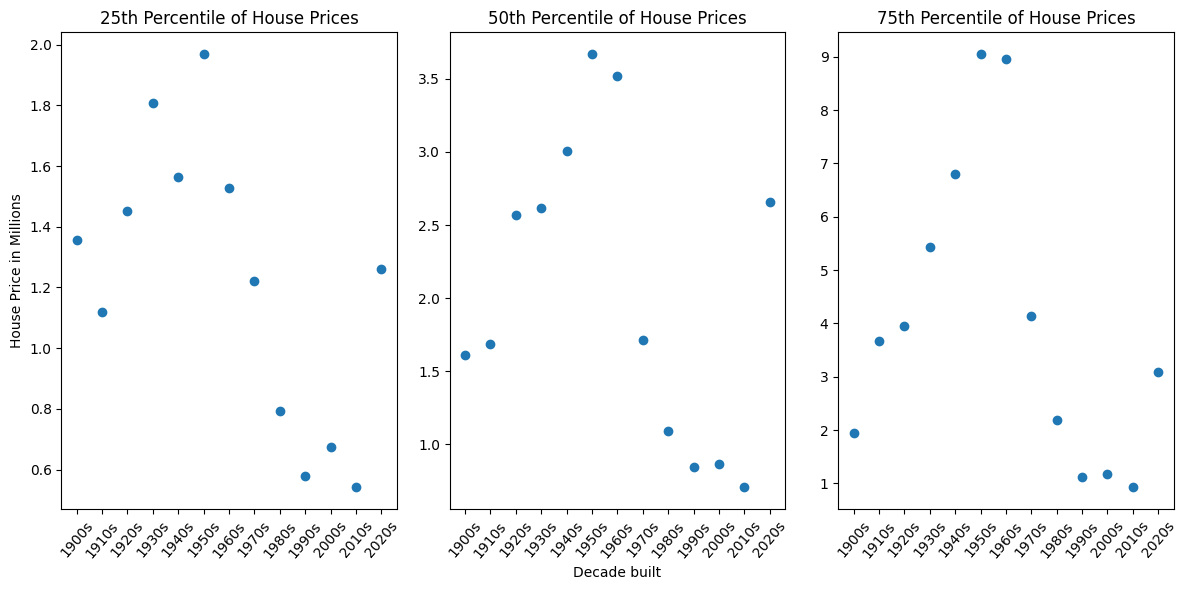

In [110]:
import numpy as np

# Bin X = YEAR_BUILT values
bin_edges = list(range(1900, 2040, 10))
labels = [f'{decade}s' for decade in range(1900, 2030, 10)]

filtered_df_copy = filtered_df.copy()
filtered_df_copy['YEAR_BUILT_BINS'] = pd.cut(filtered_df_copy['YEAR_BUILT'], bins=bin_edges, right=False, labels=labels)

# Drop nulls or na
filtered_df_copy = filtered_df_copy.dropna(subset=['YEAR_BUILT_BINS', 'HOUSE_PRICE'])

# Group by the bins, select house price, and aggregate the house price data into percentiles
percentiles_df = filtered_df_copy.groupby('YEAR_BUILT_BINS')['HOUSE_PRICE'].agg([
    ('25th', lambda x: np.percentile(x, 25)),
    ('50th', lambda x: np.percentile(x, 50)),
    ('75th', lambda x: np.percentile(x, 75))
])

# Create three subplots on one row
fig, axs = plt.subplots(1, 3, figsize=(12,6))

axs[0].scatter(percentiles_df.index.categories[percentiles_df.index.codes], percentiles_df['25th'])
axs[0].tick_params(axis='x', rotation=50)
axs[0].set_title('25th Percentile of House Prices')
axs[0].set_ylabel('House Price in Millions')

axs[1].scatter(percentiles_df.index.categories[percentiles_df.index.codes], percentiles_df['50th'])
axs[1].tick_params(axis='x', rotation=50)
axs[1].set_title('50th Percentile of House Prices')
axs[1].set_xlabel('Decade built')

axs[2].scatter(percentiles_df.index.categories[percentiles_df.index.codes], percentiles_df['75th'])
axs[2].tick_params(axis='x', rotation=50)
axs[2].set_title('75th Percentile of House Prices')

plt.tight_layout()

Please write down the **two** most interesting findings that you draw from the plot.

**Findings**
1. One of the things we see across all three plots is a rather sharp increase in housing prices from the start of the century up until the 1950's, followed by a sharp decline in housing prices right up to and including the 2010's.
2. The spectacular fall in 50th and 75th percentile housing prices from the 60's to the 70's. For houses built during the 60's, the median housing price is about \$3.5 million, and for the 70's that drops all the way to about \$1.7 million. Similarly, for houses built during the 60's, their 75th percentile price is close to \$9 million, yet for houses built during the 70's, their 75th percentile price is less than half of that at just over \$4 million. In both cases we see over a 50% decrease in value \(which begs the question: why?\).

### Task B. Correlation Coefficient

A correlation coefficient is a numerical measure of some type of correlation, meaning a statistical relationship between a pair of variables.

In the following, please implement `calc_pearson()` and `calc_spearman()`, respectively. Note that you are *NOT* allowed to use [corr](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html) from Pandas or [pearsonr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr)/[spearmanr](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr) from scipy.stats to do this task. In other words, you need to implement the actual algorithms for pearson and spearman.

In [111]:
def calc_pearson(df, x, y):
    x_bar = df[x].mean()
    y_bar = df[y].mean()

    numerator = ((df[x] - x_bar) * (df[y] - y_bar)).sum()

    x_denom = ((df[x] - x_bar) ** 2).sum() ** 0.5
    y_denom = ((df[y] - y_bar) ** 2).sum() ** 0.5

    denominator = x_denom * y_denom

    return numerator / denominator

def calc_spearman(df, x, y):
    x_rank = df[x].rank()
    y_rank = df[y].rank()

    numerator = ((x_rank - x_rank.mean()) * (y_rank - y_rank.mean())).sum()

    denominator = (x_rank.std() * y_rank.std()) * len(df)

    return numerator / denominator

Then, you can use these two functions to compute the Pearson's correlation as well as Spearman's rank correlation for three pairs of variables: <`25TH_HOUSE_PRICE`, `YEAR_BUILT`>, <`50TH_HOUSE_PRICE`, `YEAR_BUILT`>, and <`75TH_HOUSE_PRICE`, `YEAR_BUILT`>.

In [121]:
# percentiles_df = percentiles_df.reset_index()
dfcor = pd.merge(percentiles_df, filtered_df_copy, on='YEAR_BUILT_BINS', how='inner')

# Rename the columns '25th', '50th', and '75th' of dfcor to '25TH_HOUSE_PRICE', '25TH_HOUSE_PRICE', '50TH_HOUSE_PRICE', and '75TH_HOUSE_PRICE'
dfcor.rename(columns={"25th": "25TH_HOUSE_PRICE", "50th": "50TH_HOUSE_PRICE", "75th": "75TH_HOUSE_PRICE"}, inplace=True)

# print(dfcor.head(10))
print()

for TH in ["25TH", "50TH", "75TH"]:
    print(TH+"_HOUSE_PRICE\t pearson=%f\t spearman=%f"  \
          %(calc_pearson(dfcor, "YEAR_BUILT", TH+"_HOUSE_PRICE"), \
            calc_spearman(dfcor, "YEAR_BUILT", TH+"_HOUSE_PRICE")))


25TH_HOUSE_PRICE	 pearson=-0.839396	 spearman=-0.867801
50TH_HOUSE_PRICE	 pearson=-0.678011	 spearman=-0.859742
75TH_HOUSE_PRICE	 pearson=-0.516769	 spearman=-0.852264


Please write down the **two** most interesting findings that you draw from the result.



**Findings**
1. I find it interesting that, across the spectrum newer houses are cheaper. We see this with both pearson and spearman's calculations, that the coefficients are negative. The interpretation here is to say that the valuation of houses is lower the more recently they were built.
2. The stabilility of Spearman's Rank coefficient compared to Pearson's. The inter-quartile range calculated using pearson's has a change in over 0.30; however, spearman's coefficient remains consistent across the IQR.

## Part 2. Bootstrapping

In reality, it is more often than not that you can only collect a sample of the data. Whenever you derive a conclusion from a sample (e.g., Vancouver's housing price has increased by 10% since last year), you should ALWAYS ask yourself: **"CAN I TRUST IT?"**. In other words, you want to know that if the same analysis was conducted on the full data, would the same conclusion be derived? In Part 2, you will learn how to use bootstrapping to answer this question.

In [127]:
# The Teaching Assistant Gaurav Bhagchandani supplied us a sample sheet in .xlsx format which I have used here.
df_sample = pd.read_excel('property_tax_report_2023_sample.xlsx', sheet_name='in')

df_sample['CURRENT_PRICE'] = df_sample.apply(lambda x: x['CURRENT_LAND_VALUE'] \
                                             +x['CURRENT_IMPROVEMENT_VALUE'], axis = 1)

df_sample['PREVIOUS_PRICE'] = df_sample.apply(lambda x: x['PREVIOUS_LAND_VALUE'] \
                                              +x['PREVIOUS_IMPROVEMENT_VALUE'], axis = 1)

df_sample = df_sample[df_sample['LEGAL_TYPE'] == 'STRATA']

In [126]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 591 entries, 2 to 999
Data columns (total 33 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PID                         591 non-null    object 
 1   LEGAL_TYPE                  591 non-null    object 
 2   FOLIO                       591 non-null    int64  
 3   LAND_COORDINATE             591 non-null    int64  
 4   ZONING_DISTRICT             591 non-null    object 
 5   ZONING_CLASSIFICATION       588 non-null    object 
 6   LOT                         591 non-null    object 
 7   PLAN                        591 non-null    object 
 8   BLOCK                       28 non-null     object 
 9   DISTRICT_LOT                569 non-null    object 
 10  FROM_CIVIC_NUMBER           523 non-null    object 
 11  TO_CIVIC_NUMBER             591 non-null    int64  
 12  STREET_NAME                 591 non-null    object 
 13  PROPERTY_POSTAL_CODE        585 non

### Task 1. Analysis Result Without Bootstrapping

Please compute the median of PREVIOUS_PRICE and CURRENT_PRICE, respectively, and compare them in a bar chart.

Text(0, 0.5, 'House Prices ($)')

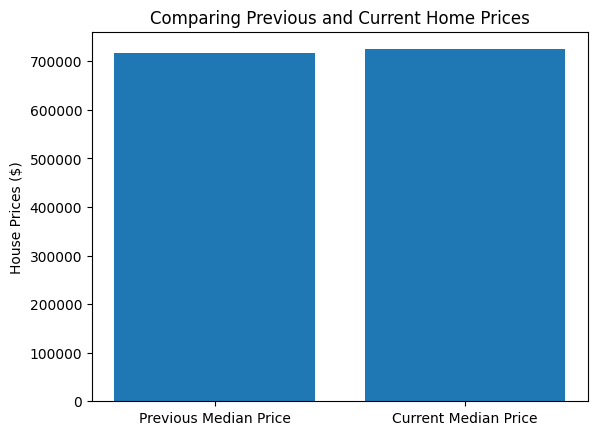

In [144]:
prev_price_med = df_sample['PREVIOUS_PRICE'].dropna().median()
curr_price_med = df_sample['CURRENT_PRICE'].dropna().median()

labels = ['Previous Median Price', 'Current Median Price']
values = [prev_price_med, curr_price_med]

plt.bar(labels, values)
plt.title('Comparing Previous and Current Home Prices')
plt.ylabel('House Prices ($)')

### Task 2. Analysis Result With Bootstrapping

From the above chart, we find that the median of PREVIOUS_PRICE is about 0.77 M, and the median of CURRENT_PRICE is about 0.72 M. Since the numbers were obtained from the sample, **"CAN WE TRUST THESE NUMBERS?"**

In the following, please implement the bootstrap by yourself, compute a 95%-confidence interval for each number, and add the confidence intervals to the above bar chart. [This document](./MIT18_05S14_Reading24.pdf) gives a good tutorial about the bootstrap. You can find the description of the algorithm in Section 7.

Text(0, 0.5, 'House Prices ($) with 95% CI')

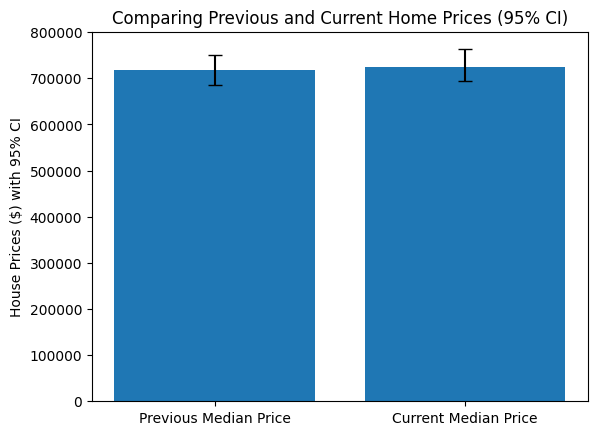

In [154]:
# Sample n from n with replacement 2000 times, each time computing the medians
medians = []

for i in range(2000):
    # Sample with replacement the entire size of the sample
    this_sample = df_sample.sample(frac=1, replace=True)
    prev_median = this_sample['PREVIOUS_PRICE'].median()
    curr_median = this_sample['CURRENT_PRICE'].median()
    medians.append((prev_median, curr_median))

# Put the data in a dataframe
median_df = pd.DataFrame(medians, columns=['Previous Median Samples', 'Current Median Samples'])

# Calculate the quantiles
prev_low_bound = median_df['Previous Median Samples'].quantile(0.025)
prev_upper_bound = median_df['Previous Median Samples'].quantile(0.975)
curr_low_bound = median_df['Current Median Samples'].quantile(0.025)
curr_upper_bound = median_df['Current Median Samples'].quantile(0.975)

# Add the error to the bar graph

# Error values calculated as the difference from the median to the lower and upper bounds
error = [
    [prev_price_med - prev_low_bound, curr_price_med - curr_low_bound],  # Lower error
    [prev_upper_bound - prev_price_med, curr_upper_bound - curr_price_med]  # Upper error
]

# Create bar chart
plt.bar(labels, values, yerr=error, capsize=5)
plt.title('Comparing Previous and Current Home Prices (95% CI)')
plt.ylabel('House Prices ($) with 95% CI')



## Submission

Complete the code in this notebook, and submit it to the CourSys activity Assignment 3.